In [10]:
import pandas as pd
import numpy as np

#load ratings from excel sheet as pandas dataframe
ratings_data = pd.read_csv("/home/sowmya/QOE_CWI/Selected_PID_data/participant_mos_ratings.csv")

ratings_matrix1 = pd.pivot_table(ratings_data, values='MOS_Rating', index='Video ID', columns='Participant ID', aggfunc=np.mean)

# Print the matrix
print(ratings_matrix1)

ratings_matrix1.to_csv('/home/sowmya/QOE_CWI/Selected_PID_data/participant_mos_ratings_matrix.csv', index=False)

Participant ID  1   2   7   8   10  11  12  15  18  19  ...  37  38  39  41  \
Video ID                                                ...                   
1                5   5   3   5   3   5   4   3   3   3  ...   4   4   3   4   
2                5   5   3   5   2   4   4   3   3   4  ...   3   4   4   5   
3                4   4   2   2   2   3   3   3   2   4  ...   2   2   3   3   
4                1   3   1   1   1   2   1   2   1   1  ...   1   1   1   1   
5                2   4   2   2   3   2   5   2   2   2  ...   3   2   2   2   
6                2   3   3   3   4   2   3   2   2   2  ...   3   2   3   4   
7                2   3   1   3   3   2   3   1   2   4  ...   3   3   3   4   
8                2   3   2   2   3   2   3   3   2   3  ...   2   3   3   3   
9                5   5   2   5   2   5   5   4   4   4  ...   3   4   4   5   
10               5   4   3   5   2   4   5   4   3   4  ...   3   4   4   4   
11               4   4   2   5   3   3   4   3   3  

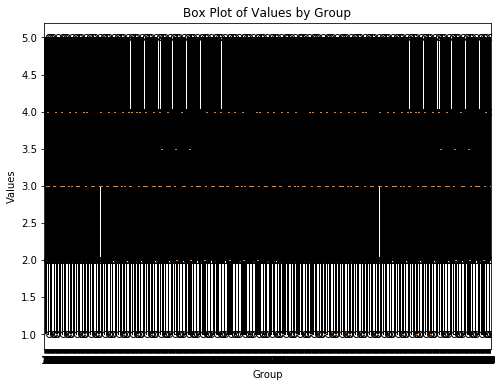

In [18]:
import matplotlib.pyplot as plt
# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot([ratings_data[ratings_data['Video ID'] == group]['MOS_Rating'] for group in ratings_data['Video ID']],
            labels=ratings_data['Video ID'])
plt.title('Box Plot of Values by Group')
plt.xlabel('Group')
plt.ylabel('Values')
plt.show()

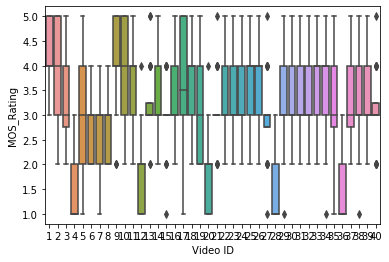

In [21]:
import seaborn as sns

# Box plot
sns.boxplot(y= ratings_data['MOS_Rating'],x= ratings_data['Video ID'] )

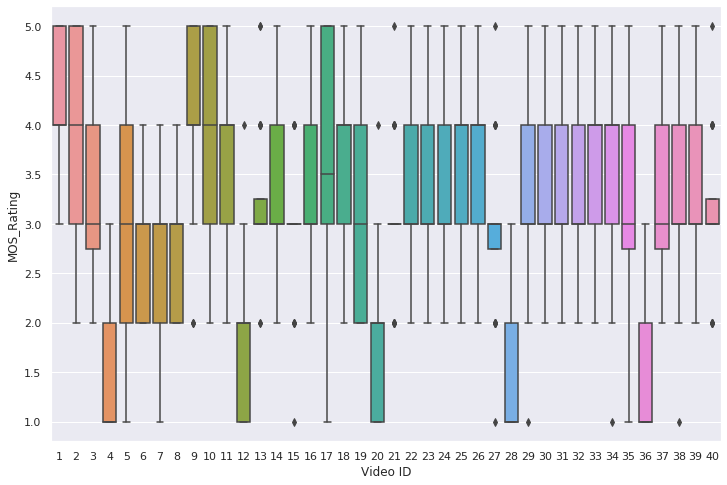

In [33]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y= ratings_data['MOS_Rating'],x= ratings_data['Video ID'])



In [18]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import pingouin as pg


# Assuming your DataFrame is named 'ratings_data'
# Convert to long format using pandas.melt
ratings_long = pd.melt(ratings_data, id_vars=['Participant ID', 'Video ID'], value_vars='MOS_Rating')

# Calculate ICC using the pingouin library
icc_result = pg.intraclass_corr(data=ratings_matrix1, targets='Participant ID', raters='Video ID', ratings='value')

# Print the ICC result
print(icc_result)

AssertionError: 

In [11]:
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import linregress

# Assuming your DataFrame is named 'ratings_data'
# Convert to long format using pandas.melt
ratings_long = pd.melt(ratings_data, id_vars=['Participant ID', 'Video ID'], value_vars='MOS_Rating')

# Get the mean rating for each video
video_means = ratings_long.groupby('Video ID')['value'].mean()

# Get the mean rating for each participant
participant_means = ratings_long.groupby('Participant ID')['value'].mean()

# Calculate the ICC using the mean squares
ms_between_videos = linregress(ratings_long['Video ID'].map(video_means), ratings_long['value']).slope
ms_within = ratings_long.groupby('Participant ID')['value'].var().mean()

icc = ms_between_videos / (ms_between_videos + ms_within)

# Print the ICC result
print(f"ICC: {icc}")

ICC: 0.49506619725293793


In [ ]:
#R script to get the result

> your_data <- read.csv("C:/Users/Sowmya/QOE_CWI/Selected_PID_data/participant_mos_ratings_matrix.csv")
> icc(your_data, model = "twoway",type = "agreement", unit = "single")
 Single Score Intraclass Correlation

   Model: twoway 
   Type : agreement 

   Subjects = 40 
     Raters = 32 
   ICC(A,1) = 0.406

 F-Test, H0: r0 = 0 ; H1: r0 > 0 
  F(39,527) = 28.1 , p = 4.62e-104 


icc(your_data, model = "twoway",type = "agreement", unit = "average")
 Average Score Intraclass Correlation

   Model: twoway 
   Type : agreement 

   Subjects = 40 
     Raters = 32 
  ICC(A,32) = 0.956

 F-Test, H0: r0 = 0 ; H1: r0 > 0 
  F(39,503) = 28.1 , p = 6.59e-102 

 95%-Confidence Interval for ICC Population Values:
  0.934 < ICC < 0.974

In [21]:
import pandas as pd
import pingouin as pg

# Assuming your DataFrame is named 'ratings_data'
# Convert to long format using pandas.melt
ratings_long = pd.melt(ratings_data, id_vars=['Participant ID', 'Video ID'], value_vars='MOS_Rating')

# Calculate ICC using the pingouin library
icc_result = pg.intraclass_corr(data=ratings_long, targets='Participant ID', raters='Video ID', ratings='value')

# Print the ICC result
print(icc_result)

NotImplementedError: Series.mean does not implement numeric_only.

In [16]:
from statsmodels.stats import inter_rater

# Create an object for the reliability analysis
reliability_analyzer = inter_rater.intraclass_corr(data=ratings_long, targets='Video ID', raters='Participant ID', ratings='value')

# Calculate ICC
icc_result = reliability_analyzer.fit()

# Print the ICC result
print(icc_result.summary())

AttributeError: module 'statsmodels.stats.inter_rater' has no attribute 'intraclass_corr'